# Resizing Image
## Metodos para el cambio de dimension en una Imagen
### Nearest Neighbor Interpolation, Bilinear Interpolation y Bicubic Interpolation

Los metodos de Interpolacion ayudan a encontrar valores medios entre dos puntos, en Procesamiento de Imagen, cuando una imagen se agranda, existen elementos desde un pixel hasta otro que son vacios, para encontrar que valores se pondran alli, se usa dichos metodos, nosotros veremos los mas conocidos.

Primero cargamos las librerias que usaremos:

In [1]:
using Images, ImageTransformations, Interpolations

Luego cargamos una imagen:

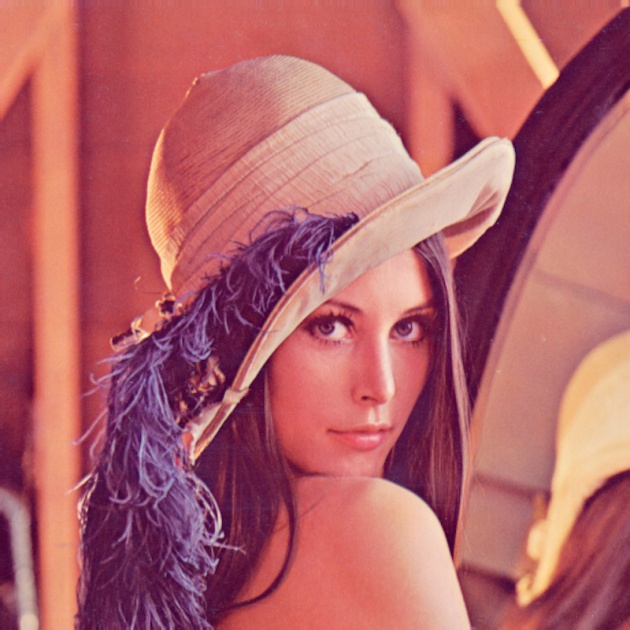

In [2]:
img = load("../data/lena.jpg")

Redimensionamos la imagen a dimensiones inferiores

,,,

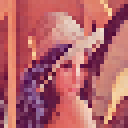
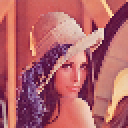
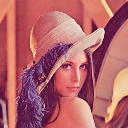
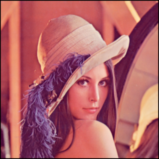

In [3]:
img_32 = imresize(img, 32, 32)
img_64 = imresize(img, 64, 64)
img_128 = imresize(img, 128, 128)

img_data = [img_32, img_64, img_128, img]

Creamos una funcion para el cambio de dimension mediante Interpolaciones, para elementos de la matriz que estan vacias, tengan valores.

In [4]:
function resizing_image(M::Matrix, size_new::Signed, method::AbstractString)
    lx, ly = size(M)
    factorX, factorY = size_new/lx, size_new/ly
    nx, ny = round(Int, factorX * lx), round(Int, factorY * ly)
    vx, vy = LinRange(1, lx, nx), LinRange(1, ly, ny)

    if method == "nearest"
        itp = interpolate(M, BSpline(Constant()))
    elseif method == "bilinear"
        itp = interpolate(M, BSpline(Linear()))
    elseif method == "bicubic"
        M = float.(M)
        itp = interpolate(M, BSpline(Cubic(Line(OnCell()))))
    else
        println("put correct method")
    end

    return itp(vx,vy)
end

resizing_image (generic function with 1 method)

Probamos para la sección de Nearest Neighbor Interpolation:

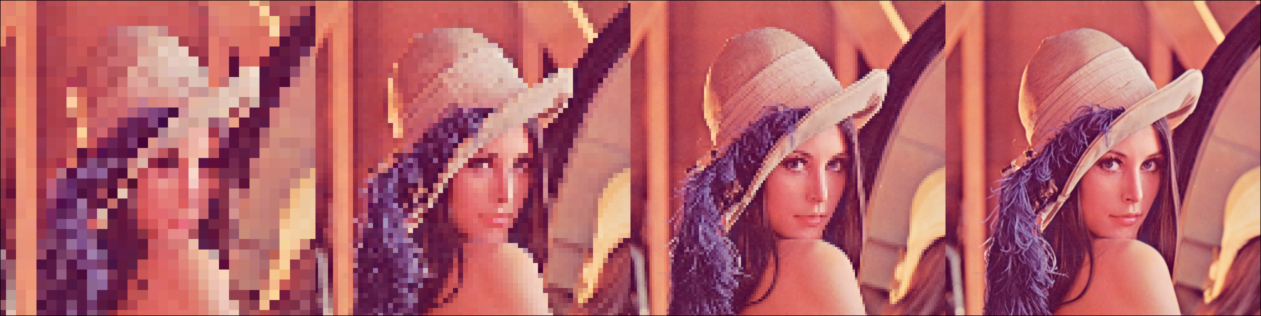

In [5]:
msv1 = mosaicview(map( img -> resizing_image(img, 630, "nearest"), img_data); nrow=1)

Probamos para la sección de Bilinear Interpolation:

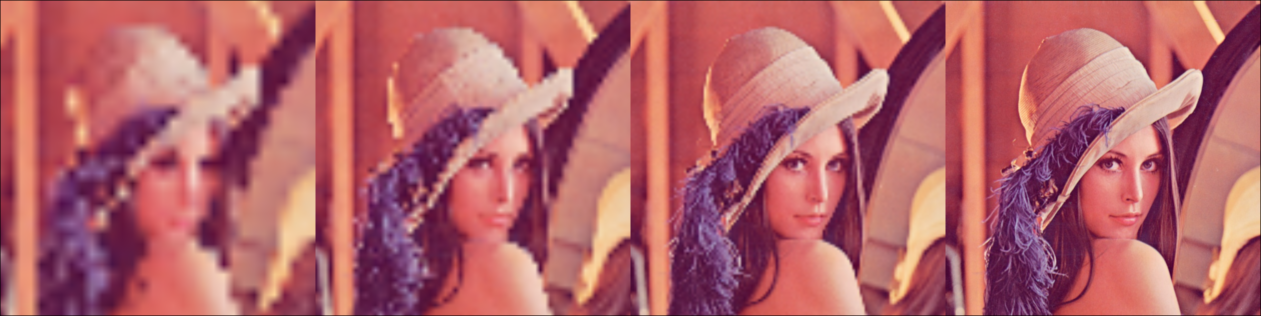

In [6]:
msv2 = mosaicview(map( img -> resizing_image(img, 630, "bilinear"), img_data); nrow=1)

Probamos para la sección de Bicubic Interpolation:

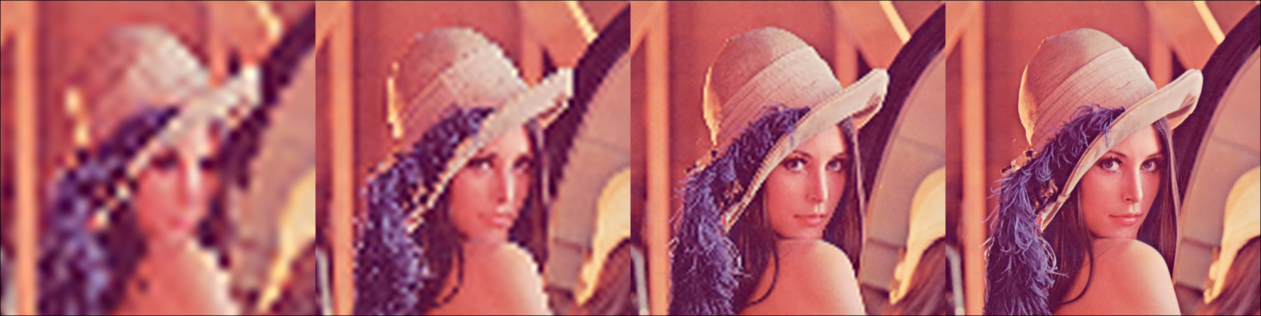

In [7]:
msv3 = mosaicview(map( img -> resizing_image(img, 630, "bicubic"), img_data); nrow=1)

Mostramos los resultados juntos:

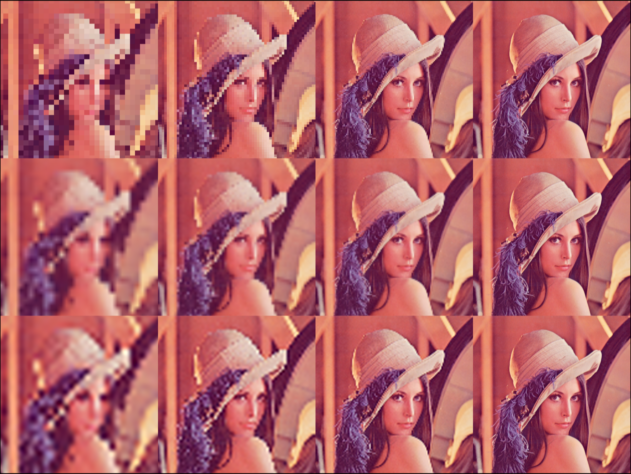

In [9]:
msv = mosaicview(msv1, msv2, msv3; nrow=3)

**Hecho en Julia 1.5.2** 

*Noviembre, 2020*